# Happines index

In [1]:
# import necessary libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# for algorithims
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree,DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [4]:
#spliting data for testing and training 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#importing linear regression
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro,normaltest,kstest #hypotheesis testing

#evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Problem Statement

Prediction of happiness score by using machine learning
Target column/ Dependant feature :
   Score  
    
Independant Features : 
    1) GDP per capita 
    2)Social support 
    3)Healthy life expectancy 
    4)Freedom to make life choices 
    5)Generosity 
    6)Perceptions of corruption


# Data Gathering

In [7]:
HI=pd.read_csv(r"D:\machine learning\project\Happines index\report_2018-2019.csv")
HI

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


# EDA(Explorative Data Analysis)

In [8]:
HI.shape

(312, 10)

In [9]:
# get infromation
HI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [10]:
# sns.pairplot(HI,hue="Score")

In [11]:
HI.isnull().sum()

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [12]:
# satatical information
HI.describe()

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,78.500000,2018.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111526
std,45.104737,0.500803,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095296
min,1.000000,2018.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,2018.000000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000
50%,78.500000,2018.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000
75%,117.250000,2019.000000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.141250
max,156.000000,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000


In [13]:
def kde_plot(a):
    k=sns.kdeplot(HI[a],fill=True,color="green")
    return k

<Axes: xlabel='GDP per capita', ylabel='Density'>

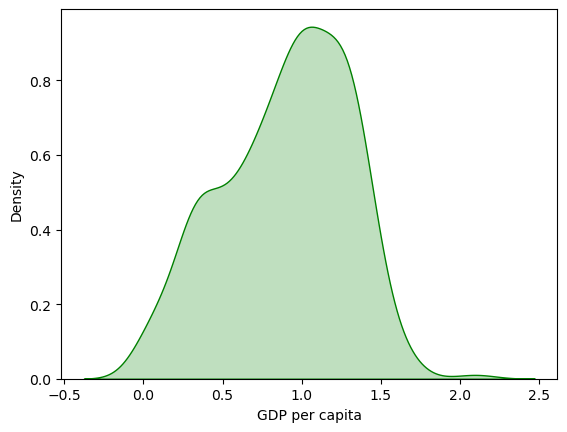

In [14]:
kde_plot("GDP per capita")

In [15]:
def Histogram(a):
    h=sns.histplot(HI[a],fill=True,color="Red")
    return h

<Axes: xlabel='GDP per capita', ylabel='Count'>

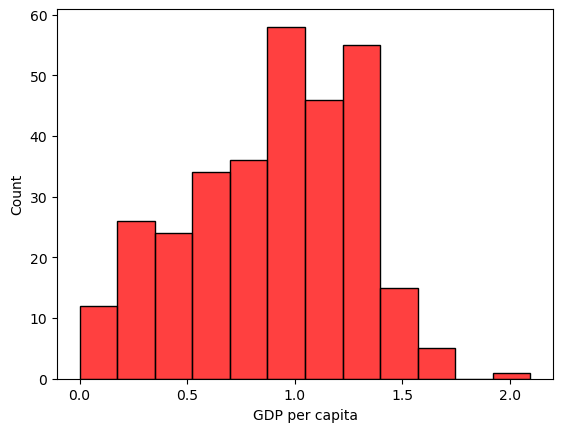

In [16]:
Histogram("GDP per capita")

<Axes: xlabel='Social support', ylabel='Density'>

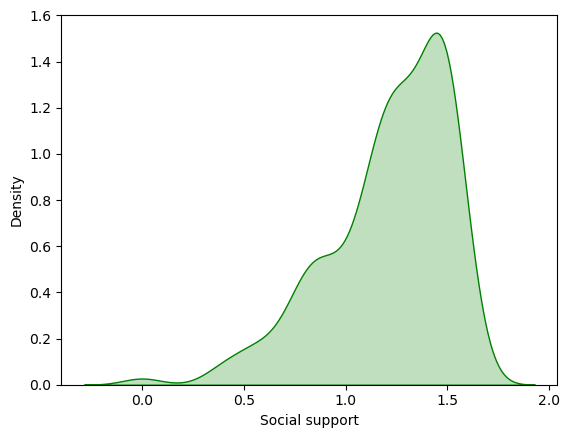

In [17]:
kde_plot("Social support")

<Axes: xlabel='Social support', ylabel='Count'>

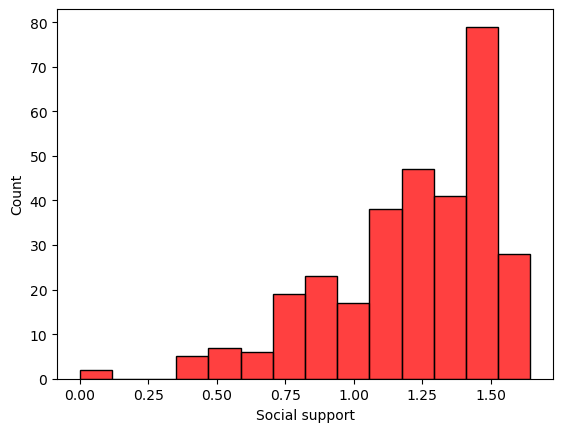

In [18]:
Histogram("Social support")

<Axes: xlabel='Healthy life expectancy', ylabel='Density'>

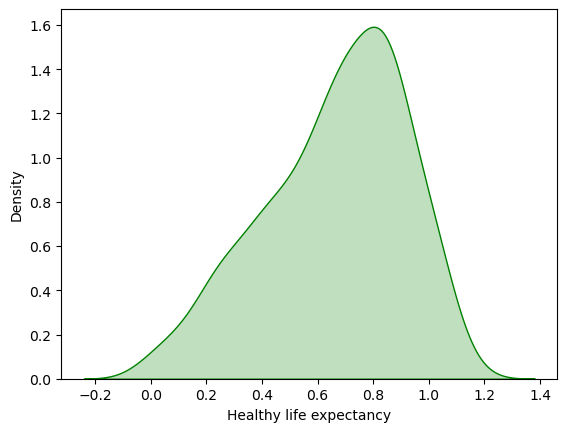

In [19]:
kde_plot("Healthy life expectancy")

<Axes: xlabel='Healthy life expectancy', ylabel='Count'>

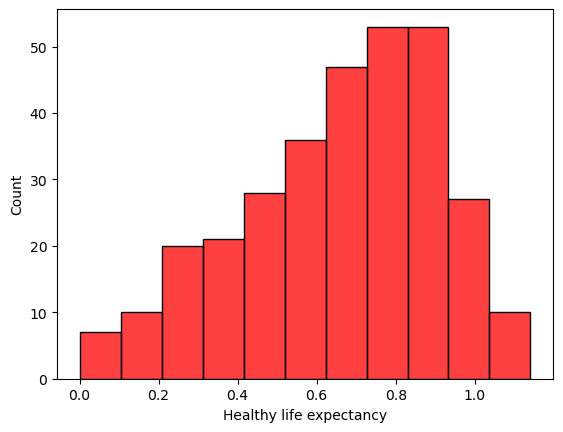

In [20]:
Histogram("Healthy life expectancy")

<Axes: xlabel='Freedom to make life choices', ylabel='Density'>

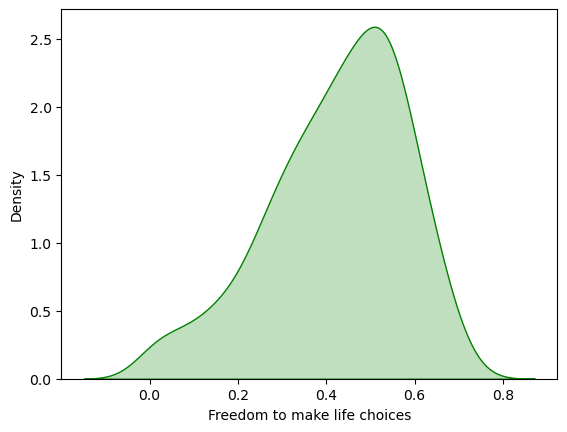

In [21]:
kde_plot("Freedom to make life choices")

<Axes: xlabel='Freedom to make life choices', ylabel='Count'>

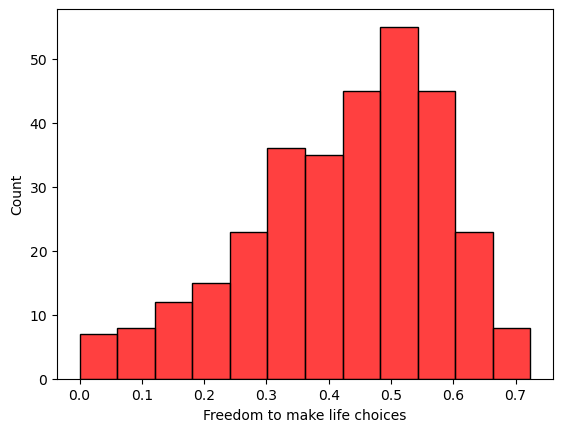

In [22]:
Histogram("Freedom to make life choices")

<Axes: xlabel='Freedom to make life choices', ylabel='Density'>

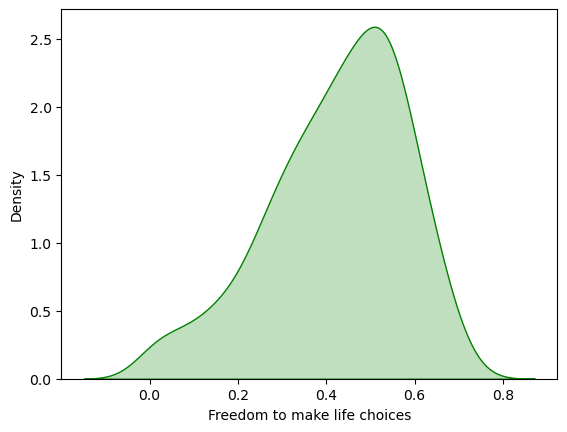

In [23]:
kde_plot("Freedom to make life choices")

<Axes: xlabel='Freedom to make life choices', ylabel='Count'>

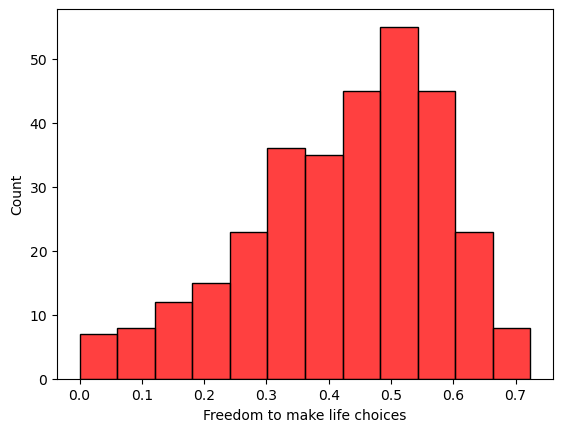

In [24]:
Histogram("Freedom to make life choices")

<Axes: xlabel='Generosity', ylabel='Density'>

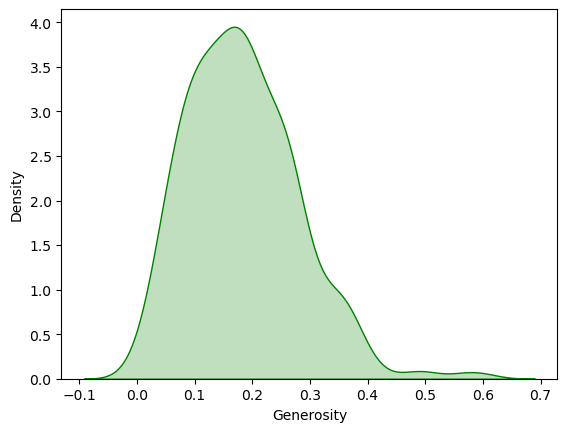

In [25]:
kde_plot("Generosity")

<Axes: xlabel='Generosity', ylabel='Count'>

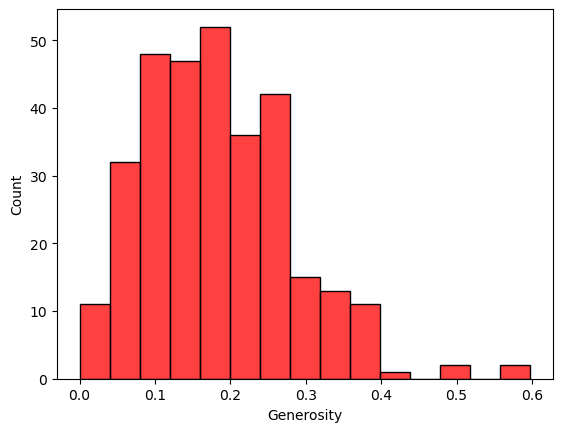

In [26]:
Histogram("Generosity")

<Axes: xlabel='Perceptions of corruption', ylabel='Density'>

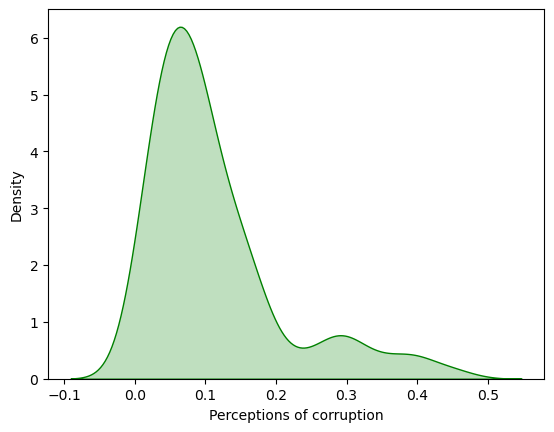

In [27]:
kde_plot("Perceptions of corruption")

<Axes: xlabel='Perceptions of corruption', ylabel='Count'>

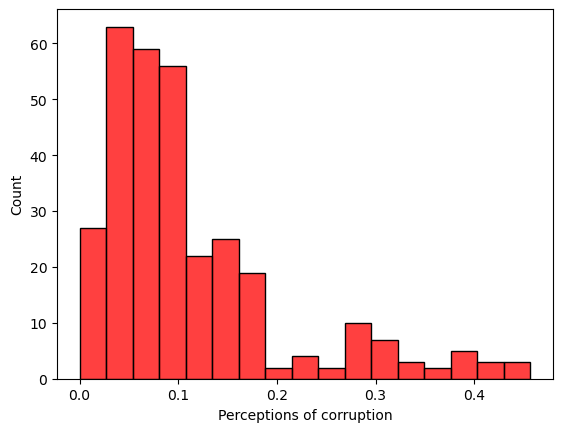

In [28]:
Histogram("Perceptions of corruption")

In [29]:
HI

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


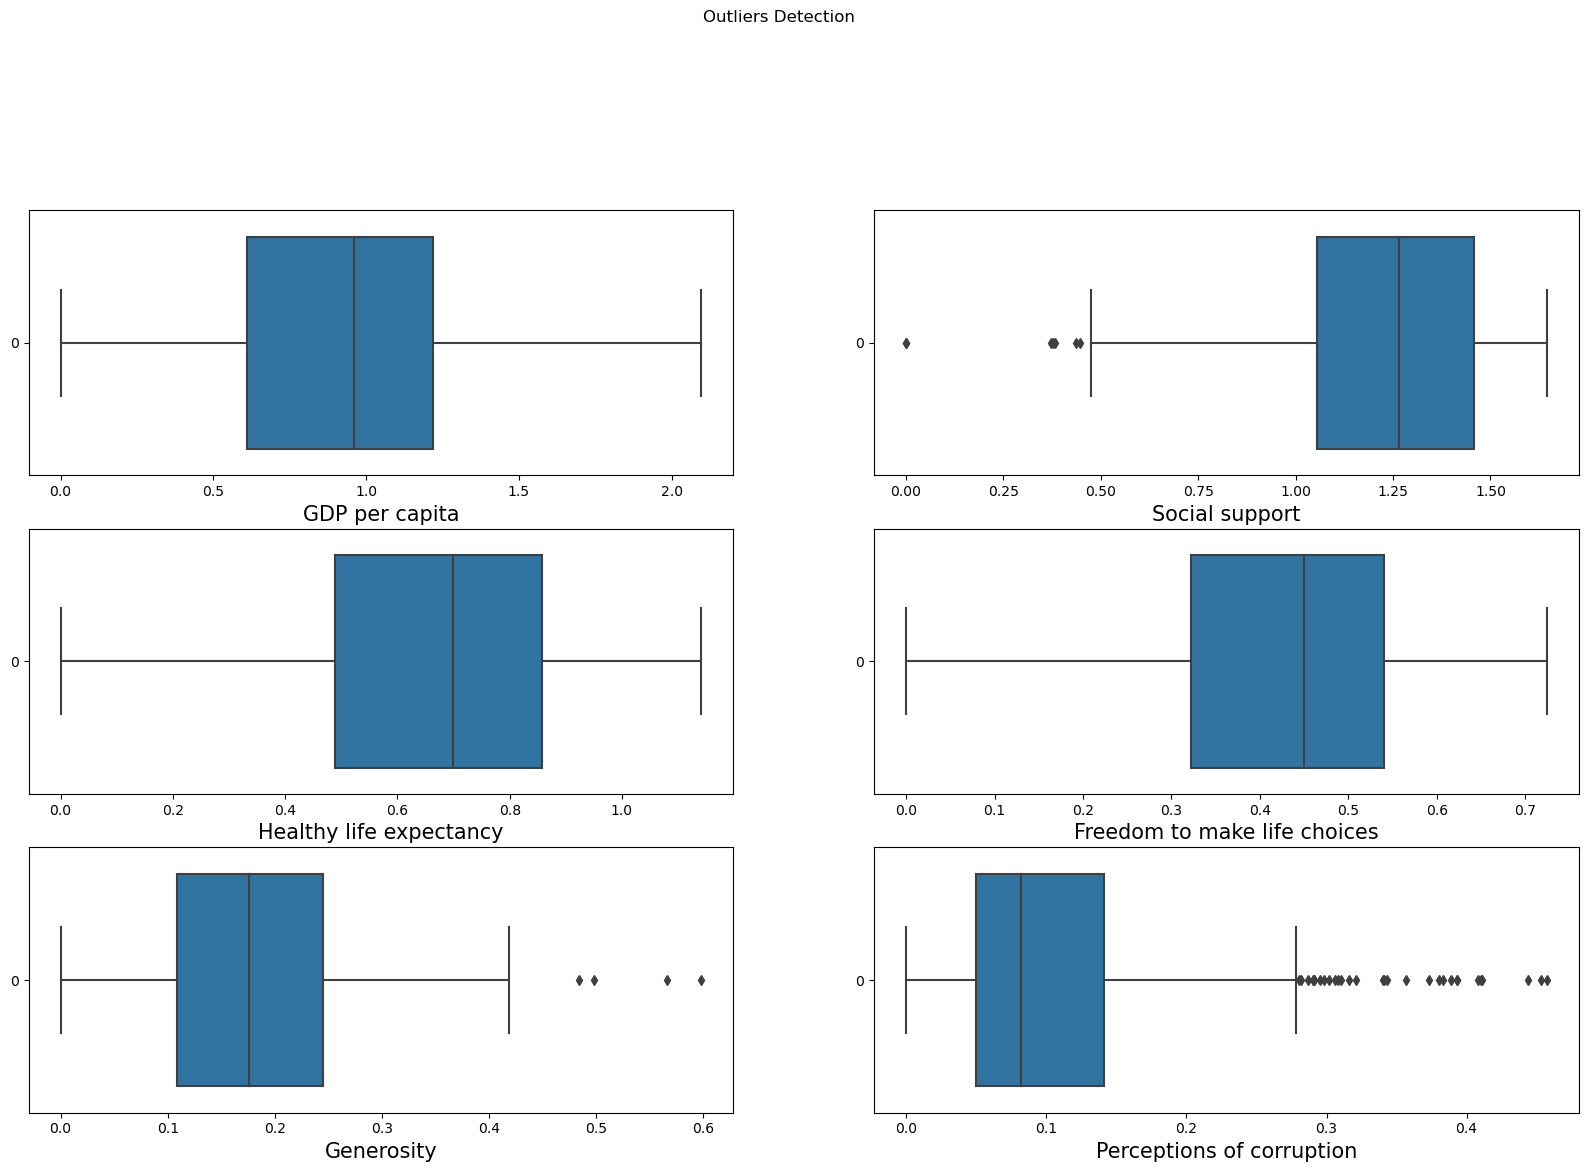

<Figure size 640x480 with 0 Axes>

In [30]:
## Checking Outliers By Calculation [BEFORE]

plt.figure(figsize=(20, 20))
plt.suptitle("Outliers Detection")
pltn = 1
columns_to_exclude = ['Overall rank', 'Country or region', 'Year', 'Score']

for i in HI.columns:
    if i not in columns_to_exclude and pltn <= 9:
        plt.subplot(5, 2, pltn)
        sns.boxplot(HI[i], orient="h")
        plt.xlabel(i, fontsize=15)
        pltn += 1

plt.show()
plt.tight_layout()

# Feature Engineering

In [31]:
HI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [32]:
#  handling of out liers
def Outlier(a):
    q1=HI[a].quantile(0.25)
    q2=HI[a].quantile(0.50)
    q3=HI[a].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    print(f"lower tail:{lower_tail}")#lower tail
    print(f"upper tail:{upper_tail}")#upper tail
    outliers = HI[(HI[a]<lower_tail)|(HI[a]>upper_tail)]
    HI[a]=np.where(HI[a]<lower_tail,lower_tail,np.where(HI[a]>upper_tail,upper_tail,HI[a]))
    return HI

In [33]:
Outlier("GDP per capita")

lower tail:-0.3055000000000002
upper tail:2.1345


,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [34]:
Outlier("Social support")

lower tail:0.4531249999999999
upper tail:2.060125


,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [35]:
Outlier("Healthy life expectancy")

lower tail:-0.06637500000000007
upper tail:1.412625


,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [36]:
Outlier("Freedom to make life choices")

lower tail:-0.00412499999999999
upper tail:0.8668750000000001


,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [37]:
Outlier("Generosity")

lower tail:-0.09562499999999997
upper tail:0.44937499999999997


,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [38]:
Outlier("Perceptions of corruption")

lower tail:-0.08687499999999997
upper tail:0.27812499999999996


,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


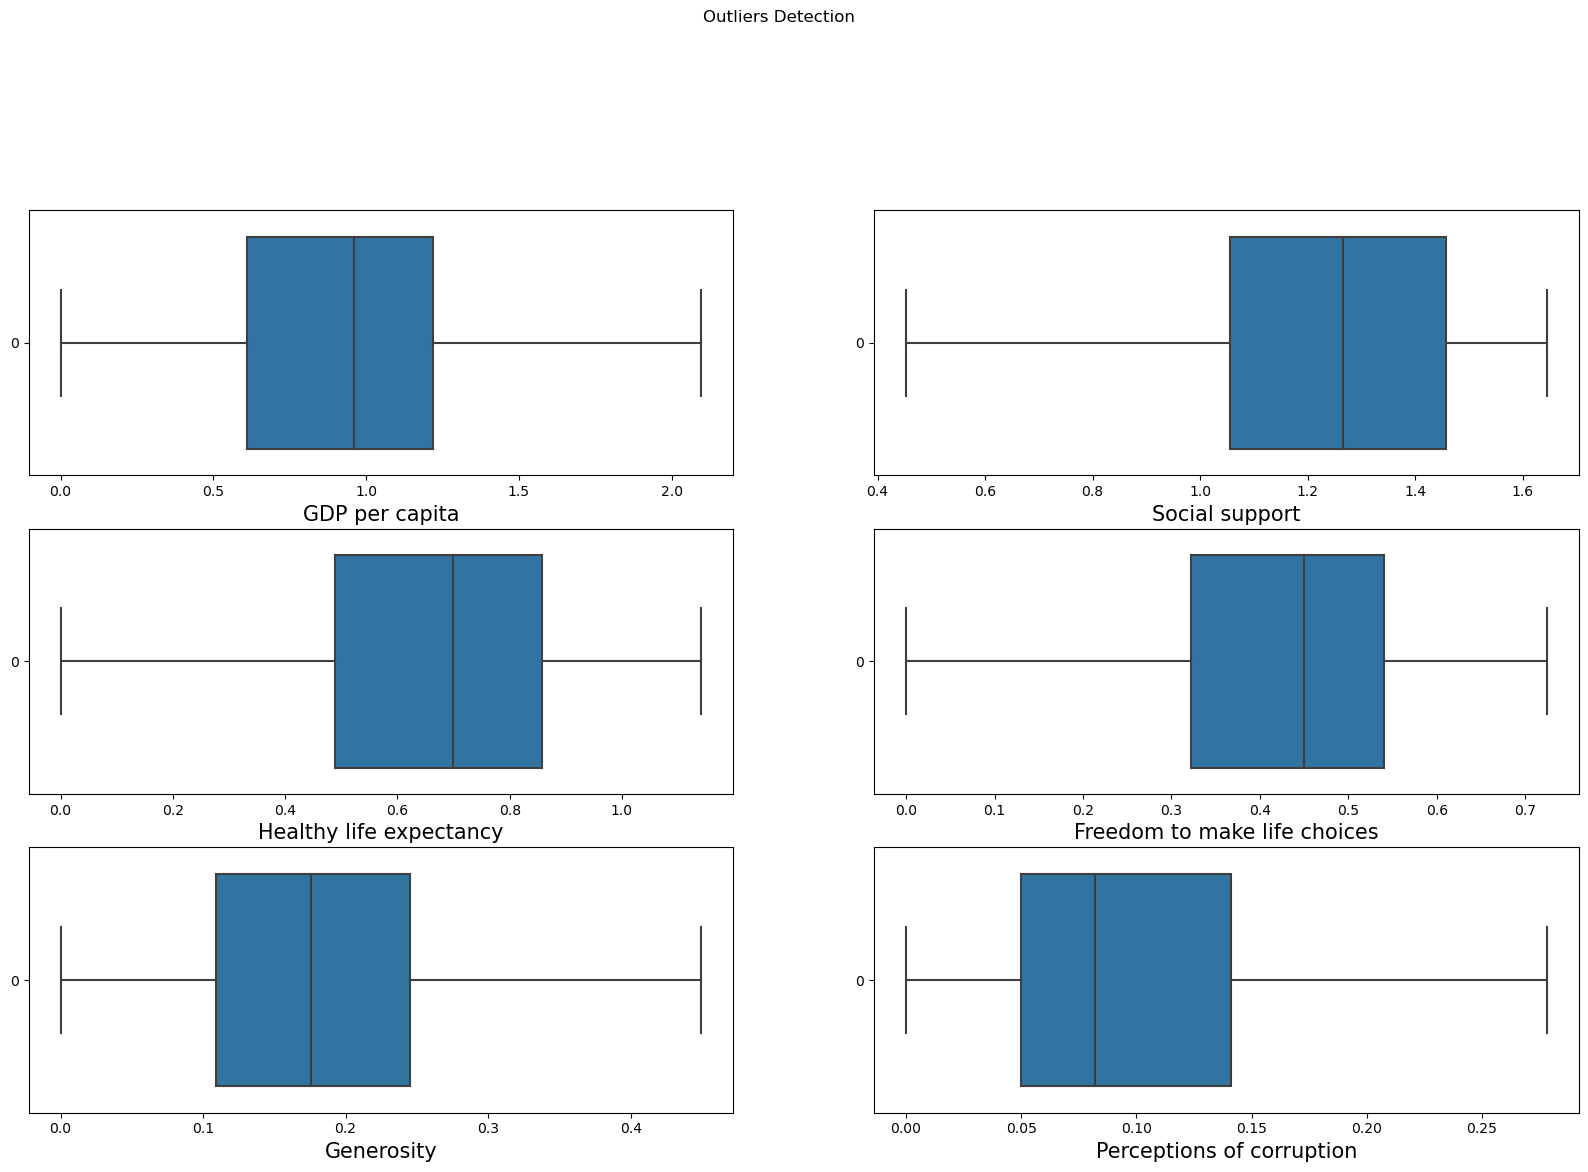

<Figure size 640x480 with 0 Axes>

In [39]:
## Checking Outliers By Calculation [AFTER]

plt.figure(figsize=(20, 20))
plt.suptitle("Outliers Detection")
pltn = 1
columns_to_exclude = ['Overall rank', 'Country or region', 'Year', 'Score']

for i in HI.columns:
    if i not in columns_to_exclude and pltn <= 9:
        plt.subplot(5, 2, pltn)
        sns.boxplot(HI[i], orient="h")
        plt.xlabel(i, fontsize=15)
        pltn += 1

plt.show()
plt.tight_layout()

# 5. Feature Selection

## Assumption 1 : Linearity

In [40]:
HI=HI.drop(["Year","Overall rank", "Country or region"],axis=1)
HI.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [41]:
HI.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.797977,0.767625,0.755875,0.539897,0.120387,0.389414
GDP per capita,0.797977,1.000000,0.717859,0.816590,0.342953,-0.042026,0.301938
Social support,0.767625,0.717859,1.000000,0.668825,0.423337,-0.006804,0.175966
Healthy life expectancy,0.755875,0.816590,0.668825,1.000000,0.301488,0.008631,0.276501
Freedom to make life choices,0.539897,0.342953,0.423337,0.301488,1.000000,0.276912,0.433870
Generosity,0.120387,-0.042026,-0.006804,0.008631,0.276912,1.000000,0.363575
Perceptions of corruption,0.389414,0.301938,0.175966,0.276501,0.433870,0.363575,1.000000


<Axes: >

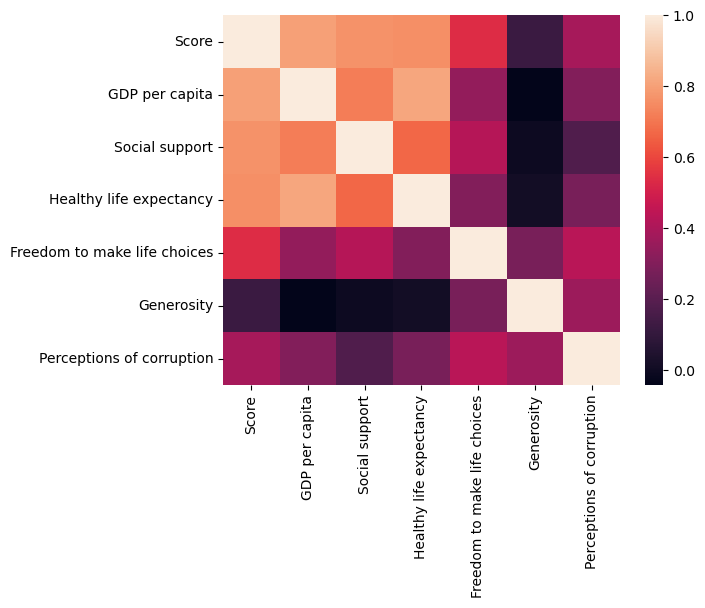

In [42]:
sns.heatmap(HI.corr())

<Axes: >

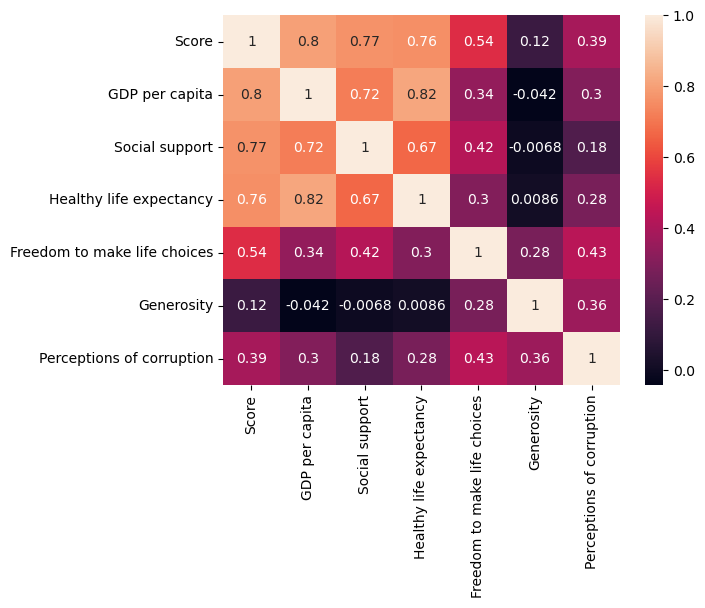

In [43]:
sns.heatmap(HI.corr(),annot=True)

## Assumption 2 : No Multicolinearity

In [44]:
vif_HI=pd.DataFrame()
HI1=HI.iloc[:,1:]
vif_HI["Features"]=HI1.columns
vif_HI


,Features
0,GDP per capita
1,Social support
2,Healthy life expectancy
3,Freedom to make life choices
4,Generosity
5,Perceptions of corruption


In [45]:
vif_list=[]
for i in range(HI1.shape[1]):
    vif=variance_inflation_factor(HI1.to_numpy(),i)
    vif_list.append(vif)

In [46]:
vif_list

[22.247759245804016,
 26.884487490923505,
 24.70133792492707,
 12.559775224610856,
 5.38371289677319,
 4.147224841764305]

In [47]:
vif_HI["VIF"]=vif_list

In [48]:
vif_HI

,Features,VIF
0,GDP per capita,22.247759
1,Social support,26.884487
2,Healthy life expectancy,24.701338
3,Freedom to make life choices,12.559775
4,Generosity,5.383713
5,Perceptions of corruption,4.147225


# Training Test Split

In [49]:
x=HI1 #independent Features
y=HI["Score"] #target column

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [51]:
xtrain.shape

(249, 6)

In [52]:
ytrain.shape

(249,)

In [53]:
xtest.shape

(63, 6)

In [54]:
ytest.shape

(63,)

# Model Training

# liner regression

In [55]:
lin_reg = LinearRegression()

lin_reg_model = lin_reg.fit(xtrain,ytrain) #implements BFL, Gradient Descent, Optimal Cost function

In [56]:
lin_reg_model

LinearRegression()

In [57]:
ytrain_pred=lin_reg_model.predict(xtrain)

In [58]:
ytrain.head()

23     6.923
156    3.975
162    7.090
29     5.082
258    6.354
Name: Score, dtype: float64

In [59]:
ytrain_pred

array([6.60571952, 3.91338037, 7.02040069, 5.67278809, 6.28011586,
       5.38794748, 6.26471982, 4.1750897 , 5.67241932, 5.87732257,
       6.78803427, 2.88626122, 5.64293111, 5.65502255, 5.99963076,
       5.18986814, 6.91898404, 3.71400137, 7.0111795 , 4.65224207,
       4.30983449, 4.53831789, 4.74074922, 5.64129453, 6.74169178,
       5.33719425, 4.423771  , 6.48867709, 6.00014807, 5.56601036,
       4.29425831, 7.15172249, 5.67393209, 4.85598882, 5.33562892,
       6.91339637, 3.72719506, 4.79068566, 4.74621132, 4.70341264,
       6.59734666, 5.78495999, 6.22445481, 6.13048788, 3.63919003,
       5.4108792 , 5.52656223, 5.16989572, 5.25076299, 5.29161398,
       5.87457421, 6.77883866, 4.20715037, 5.59732382, 6.61864084,
       6.79292545, 6.01744383, 5.326757  , 7.04215698, 7.09385921,
       4.52582026, 5.66920239, 6.41518073, 4.33438296, 3.73313834,
       5.73444994, 5.63233371, 3.16709889, 5.76464401, 4.68944631,
       4.39846   , 7.05550013, 5.24434912, 4.8207253 , 7.01581

In [60]:
residual=ytrain-ytrain_pred #error
residual

23     0.317280
156    0.061620
162    0.069599
29    -0.590788
258    0.073884
         ...   
19    -0.460211
243    0.929499
66     0.906569
15    -0.208237
166   -0.046094
Name: Score, Length: 249, dtype: float64

## Assumption 3: Normality of residual

residual should be normally distributed

to check :
Visualization:
    kdeplot/histogram
    qqplot 
    
Hypothesis testing
    shapiro
    normaltest
    kstest


### kdeplot

<Axes: xlabel='Score', ylabel='Density'>

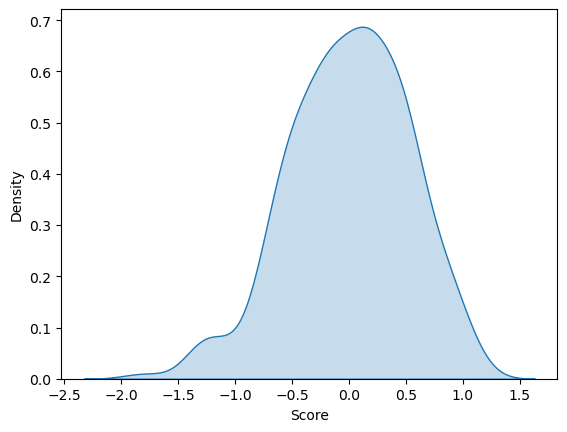

In [61]:
sns.kdeplot(residual,fill=True)

### Hypothesis Testing : shapiro

In [62]:
stats,p_val = shapiro(residual)
print(stats)
print(p_val)

if p_val>=0.05:
    print("Residual is normally distributed")
    print("Null Hypothesis H0 is True")
    
else:
    print("residual is not normally distributed")
    print("Alternative hypothesis H1 is true")

0.9874363541603088
0.028227556496858597
residual is not normally distributed
Alternative hypothesis H1 is true


In [63]:
stats, p_val = normaltest(residual)
print(stats)
print(p_val)

if p_val>=0.05:
    print("Residual is normally distributed")
    print("Null Hypothesis H0 is True")
    
else:
    print("residual is not normally distributed")
    print("Alternative hypothesis H1 is true")

5.453795689913538
0.06542192415578423
Residual is normally distributed
Null Hypothesis H0 is True


In [64]:
np.mean(residual)

-4.601406270735589e-16

 ## Assumption 4 : Homoscadasticity

<Axes: xlabel='Score', ylabel='Score'>

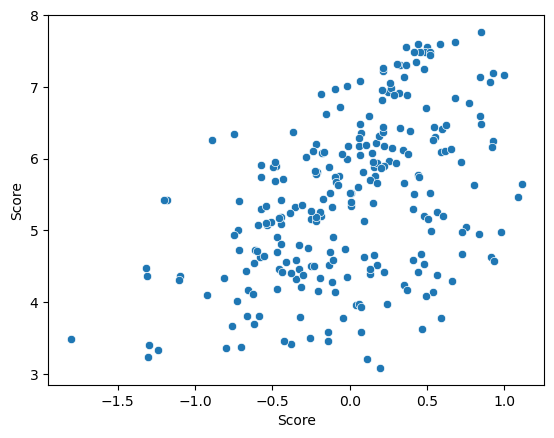

In [65]:
sns.scatterplot(x=residual,y=HI["Score"])

# Model evaluation on its training data

In [66]:
mse = mean_squared_error(ytrain, ytrain_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)
rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytrain, ytrain_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytrain,ytrain_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.2742090101450823
--------------------------------------------------
Root Mean Squared Error: 0.5236497017521182
--------------------------------------------------
Mean Absolute Error: 0.4237453278601767
--------------------------------------------------
r2 score: 0.7814808370861887
--------------------------------------------------


### model evaluation for testing data

In [67]:
ytest

43     2.905
4      5.211
279    3.999
100    5.287
281    6.192
       ...  
222    5.631
103    6.382
77     6.028
190    4.417
238    4.681
Name: Score, Length: 63, dtype: float64

In [68]:
ytest_pred = lin_reg_model.predict(xtest)
ytest_pred

array([2.9256129 , 4.99638017, 3.5360431 , 5.18327827, 6.09283317,
       7.05375738, 5.75397862, 6.25171547, 5.74802416, 5.40499111,
       6.46389612, 5.19085532, 5.85118412, 6.11843599, 6.12655649,
       4.37551483, 5.53573502, 4.41244377, 5.66527474, 5.55385724,
       5.23166325, 6.96051186, 5.01700031, 3.63463496, 6.76476718,
       4.9044579 , 3.17477711, 6.00120821, 4.32395002, 5.35309202,
       4.34434376, 4.4805526 , 3.62995462, 6.34146212, 5.21901436,
       5.73218932, 5.64136128, 2.85896424, 5.21687345, 4.70377162,
       6.08296075, 5.02874454, 3.32630934, 5.60345906, 3.57773454,
       4.89766015, 5.58574282, 6.25208758, 5.67642559, 4.92329706,
       5.6532641 , 5.72215156, 4.30394694, 5.23387237, 4.58358933,
       6.81122431, 6.96722263, 6.01487171, 5.52530342, 5.50100153,
       5.71960967, 4.14148976, 4.52835901])

In [69]:
mse = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytest, ytest_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytest, ytest_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.22295270461622924
--------------------------------------------------
Root Mean Squared Error: 0.4721786786971953
--------------------------------------------------
Mean Absolute Error: 0.33778845563446847
--------------------------------------------------
r2 score: 0.8057865721380988
--------------------------------------------------


# Decision Tree Algorithm

In [70]:
dt_reg=DecisionTreeRegressor()
dt_reg

DecisionTreeRegressor()

In [71]:
dt_reg_model=dt_reg.fit(xtrain,ytrain)
dt_reg_model

DecisionTreeRegressor()

### Decision tree Model Evaluation 

In [72]:
ytrain_pred=dt_reg_model.predict(xtrain)

In [73]:
# for training data
mse = mean_squared_error(ytrain, ytrain_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytrain, ytrain_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytrain, ytrain_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.0
--------------------------------------------------
Root Mean Squared Error: 0.0
--------------------------------------------------
Mean Absolute Error: 0.0
--------------------------------------------------
r2 score: 1.0
--------------------------------------------------


In [74]:
#testing

In [75]:
ytest_pred=dt_reg_model.predict(xtest)

In [76]:
# for testing data
mse = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytest, ytest_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytest, ytest_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.5515937460317463
--------------------------------------------------
Root Mean Squared Error: 0.7426935747882476
--------------------------------------------------
Mean Absolute Error: 0.518
--------------------------------------------------
r2 score: 0.5195083531800564
--------------------------------------------------


In [77]:
# model overfits because r2 score is 1 for testing

# decision tree with hyperparameter tunning

In [78]:
hyperparameters={
    "criterion":["squarer_error","absolute_error"],
    "max_depth":np.arange(5,10),
    "min_samples_split":np.arange(5,10),
    "min_samples_leaf":np.arange(5,10)
}

In [79]:
rscv=RandomizedSearchCV(dt_reg_model,hyperparameters,cv=5)
rscv=rscv.fit(xtrain,ytrain)
rscv

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squarer_error',
                                                      'absolute_error'],
                                        'max_depth': array([5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([5, 6, 7, 8, 9]),
                                        'min_samples_split': array([5, 6, 7, 8, 9])})

In [80]:
rscv.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=8, min_samples_split=5)

In [81]:
dt_hyp=DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=5, min_samples_split=9)
dt_hyp

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=5, min_samples_split=9)

In [82]:
dt_hyp_model=dt_hyp.fit(xtrain,ytrain)
dt_hyp_model

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=5, min_samples_split=9)

### decision tree with hyperparameter model evaluation

In [83]:
ytrain_pred = dt_hyp_model.predict(xtrain)

In [84]:
# for training data
mse = mean_squared_error(ytrain, ytrain_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytrain, ytrain_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytrain, ytrain_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.17330200200803217
--------------------------------------------------
Root Mean Squared Error: 0.41629557048812343
--------------------------------------------------
Mean Absolute Error: 0.2572971887550201
--------------------------------------------------
r2 score: 0.8618943688610153
--------------------------------------------------


In [85]:
ytest_pred = dt_hyp_model.predict(xtest)

In [86]:
# for testing data
mse = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytest, ytest_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytest, ytest_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.2511853214285714
--------------------------------------------------
Root Mean Squared Error: 0.5011839197625673
--------------------------------------------------
Mean Absolute Error: 0.37905555555555565
--------------------------------------------------
r2 score: 0.7811932248715799
--------------------------------------------------


# Random Forest

In [87]:
rf_reg=RandomForestRegressor()
rf_reg_model=rf_reg.fit(xtrain,ytrain)
rf_reg_model

RandomForestRegressor()

### Random Forest for model evaluation

In [88]:
ytrain_pred = rf_reg_model.predict(xtrain)

In [89]:
# for training data
mse = mean_squared_error(ytrain, ytrain_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytrain, ytrain_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytrain, ytrain_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.03470093984618458
--------------------------------------------------
Root Mean Squared Error: 0.1862818827642253
--------------------------------------------------
Mean Absolute Error: 0.14376783132530066
--------------------------------------------------
r2 score: 0.9723465675927324
--------------------------------------------------


In [90]:
ytest_pred = rf_reg_model.predict(xtest)

In [91]:
# for testing data
mse = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytest, ytest_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytest, ytest_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.1698623268047615
--------------------------------------------------
Root Mean Squared Error: 0.41214357547432606
--------------------------------------------------
Mean Absolute Error: 0.2919201587301584
--------------------------------------------------
r2 score: 0.8520334399614641
--------------------------------------------------


# AdaBoost

In [92]:
ad_reg = AdaBoostRegressor()
ad_reg_model = ad_reg.fit(xtrain,ytrain)
ad_reg_model

AdaBoostRegressor()

### Adaboost model evaluation

In [93]:
ytrain_pred = ad_reg_model.predict(xtrain)

In [94]:
# for training data
mse = mean_squared_error(ytrain, ytrain_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytrain, ytrain_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytrain, ytrain_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.16337166825068428
--------------------------------------------------
Root Mean Squared Error: 0.4041926128106305
--------------------------------------------------
Mean Absolute Error: 0.3508125758060957
--------------------------------------------------
r2 score: 0.8698079243600206
--------------------------------------------------


In [95]:
ytest_pred = rf_reg_model.predict(xtest)

In [96]:
mse = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error: {mse}")
print("-"*50)

rmse =np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print("-"*50)

mae = mean_absolute_error(ytest, ytest_pred)
print(f"Mean Absolute Error: {mae}")
print("-"*50)

r2score = r2_score(ytest, ytest_pred)
print(f"r2 score: {r2score}")
print("-"*50)

Mean Squared Error: 0.1698623268047615
--------------------------------------------------
Root Mean Squared Error: 0.41214357547432606
--------------------------------------------------
Mean Absolute Error: 0.2919201587301584
--------------------------------------------------
r2 score: 0.8520334399614641
--------------------------------------------------


# save model into pickle file

### save finalized model ( Random Forest) 

In [97]:
import pickle

In [98]:
with open("model.pkl","wb")as f:
    pickle.dump(rf_reg_model,f)

In [99]:
y.head(1)

0    3.203
Name: Score, dtype: float64

In [100]:
test_data=x.head(1)
test_data

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.35,0.517,0.361,0.0,0.158,0.025


In [101]:
with open ("model.pkl","rb") as f:
    final_model = pickle.load(f)

In [102]:
final_model.predict(test_data)[0]

3.4141499999999967

In [103]:
# Function to predict happiness index

In [104]:
def Happines_index(GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption):
    test_data=pd.DataFrame({"GDP per capita":[GDP_per_capita],
                            "Social support":[Social_support],
                            "Healthy life expectancy":[Healthy_life_expectancy],
                            "Freedom to make life choices":[Freedom_to_make_life_choices],
                            "Generosity":[Generosity],
                            "Perceptions of corruption":[Perceptions_of_corruption]
                           })
    with open("model.pkl","rb")as f:
        final_model=pickle.load(f)
    print(f" Happiness index score:{final_model.predict(test_data)[0]}")

In [105]:
# test the function

In [106]:
Happines_index(0.350,0.517,0.361,0.000,0.158,0.025)

 Happiness index score:3.4141499999999967
